In [59]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [145]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [131]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc, text


In [155]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [157]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [159]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [161]:
# Save references to each table

station = Base.classes.station
measurement = Base.classes.measurement

In [163]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [165]:
# Find the most recent date in the data set.
#first_row = session.query(measurement).first()
#first_row.__dict__#.get("date")

session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

<Figure size 1000x600 with 0 Axes>

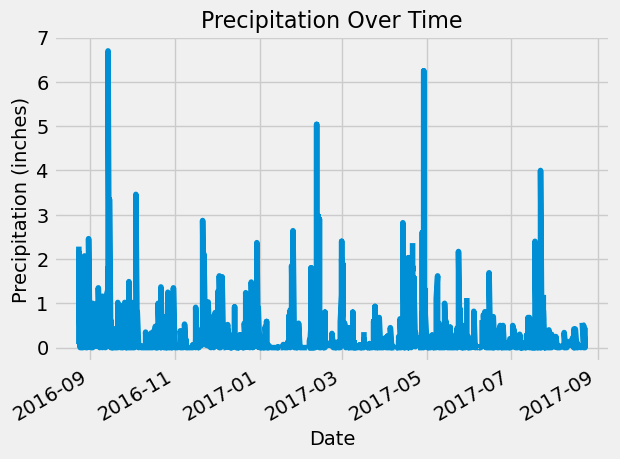

In [95]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


results = session.query(measurement.prcp, measurement.date).filter(measurement.date > '2016-08-23').order_by(measurement.date).all()
# Calculate the date one year from the last date in data set.

#df = pd.DataFrame(results, columns=['prcp'])
df = pd.DataFrame(results, columns=['prcp', 'date'])

# Perform a query to retrieve the data and precipitation scores

df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by 'date'
df_sorted = df.sort_values(by='date')

#print(df_sorted)

# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

plt.figure(figsize=(10, 6))  
df.plot(x='date', y='prcp', kind='line', legend=False)


plt.title('Precipitation Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation (inches)', fontsize=14)
plt.grid(True) 

# Show the plot
plt.show()


In [99]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['prcp'].describe()

summary_stats

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [111]:
# Design a query to calculate the total number of stations in the dataset
first_row = session.query(measurement).first()
first_row.__dict__#.get("date")

results2 = session.query(measurement.station).group_by(measurement.station).all()
print(len(results2))

9


In [133]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
#results3 = session.query(measurement.station).group_by(measurement.station).count()#.all()

#results3 = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(desc('count')).all()

results3 = session.query(measurement.station,func.count(measurement.station).label('count')).group_by(measurement.station).order_by(text('count DESC')).all()
results3

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [143]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
result4 = session.query(
    func.min(measurement.tobs).label('min_temp'),
    func.max(measurement.tobs).label('max_temp'),
    func.avg(measurement.tobs).label('avg_temp')
).filter(measurement.station == 'USC00519281').all()

result4

[(54.0, 85.0, 71.66378066378067)]

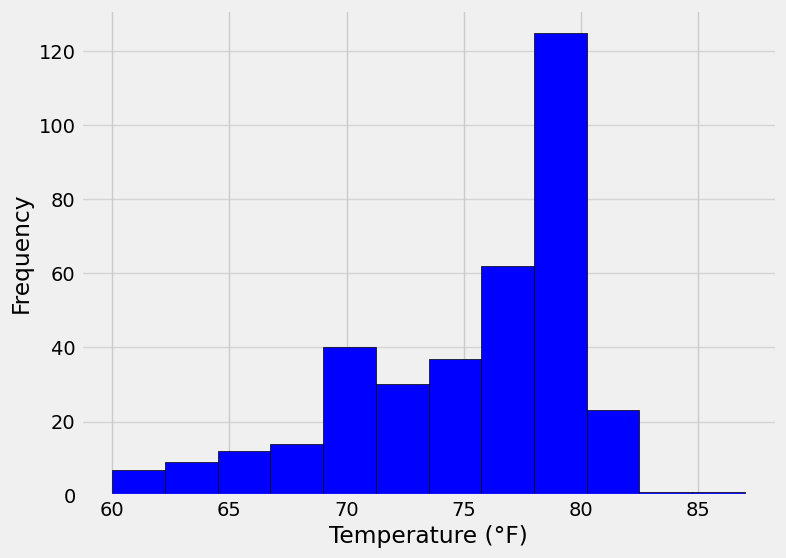

In [151]:

most_active_station = 'USC00519397'

latest_date = session.query(func.max(measurement.date)).scalar()
last_12_months = (dt.datetime.strptime(latest_date, "%Y-%m-%d") - dt.timedelta(days=365)).date()

temp_results = session.query(measurement.tobs).filter(
    measurement.station == most_active_station,
    measurement.date >= last_12_months
).all()

temperatures = [temp[0] for temp in temp_results]

plt.figure(figsize=(8, 6))
plt.hist(temperatures, bins=12, color='blue', edgecolor='black')
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Close Session

In [153]:
# Close Session
session.close()